VARIANCE AND STANDARD DEVIATION TUTORIAL

### SECTION 1: What is Variance and Standard Deviation? ###

Dataset 1 - Low Spread:
  Mean: 49.48
  Variance: 20.62
  Standard Deviation: 4.54

Dataset 2 - High Spread:
  Mean: 50.33
  Variance: 204.63
  Standard Deviation: 14.31


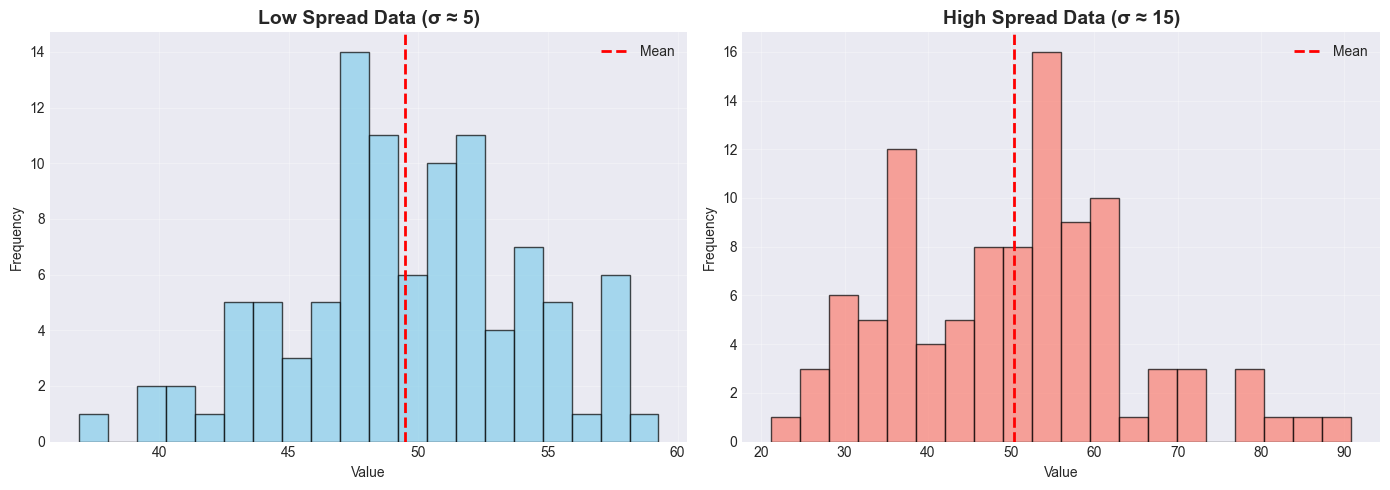


Key Insight: Both datasets have similar means, but very different spreads!


### SECTION 2: Manual Calculation ###

Dataset: [2 4 4 4 5 5 7 9]
Number of values (n): 8

Step 1 - Mean: 5.00

Step 2 - Deviations from mean:
  Value 2: 2 - 5.00 = -3.00
  Value 4: 4 - 5.00 = -1.00
  Value 4: 4 - 5.00 = -1.00
  Value 4: 4 - 5.00 = -1.00
  Value 5: 5 - 5.00 = 0.00
  Value 5: 5 - 5.00 = 0.00
  Value 7: 7 - 5.00 = 2.00
  Value 9: 9 - 5.00 = 4.00

Step 3 - Squared deviations:
  (-3.00)² = 9.00
  (-1.00)² = 1.00
  (-1.00)² = 1.00
  (-1.00)² = 1.00
  (0.00)² = 0.00
  (0.00)² = 0.00
  (2.00)² = 4.00
  (4.00)² = 16.00

Step 4 - Variance (s²):
  Sum of squared deviations / (n-1)
  32.00 / 7 = 4.57

Step 5 - Standard Deviation (s):
  √4.57 = 2.14

Verification with NumPy:
  np.var(data, ddof=1) = 4.57
  np.std(data, ddof=1) = 2.14


### SECTION 3: Visualizing Standard Deviation ###



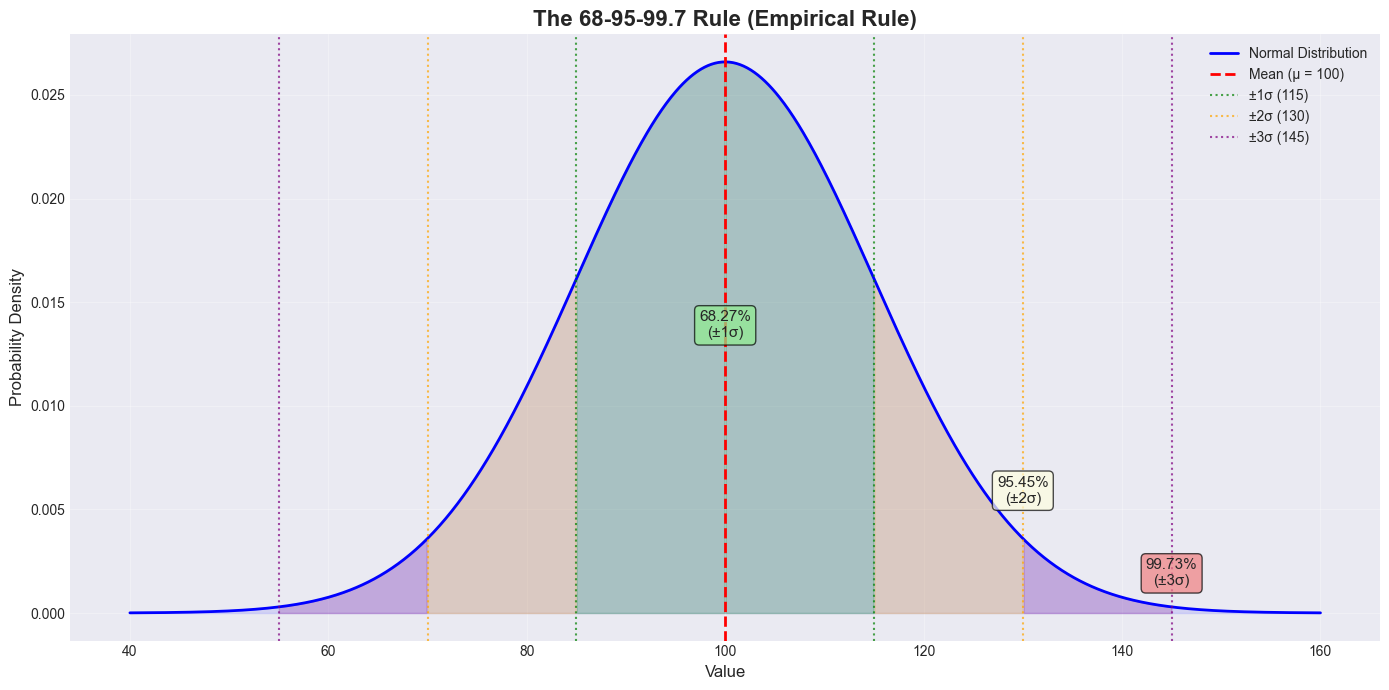

The Empirical Rule:
  • ~68% of data falls within ±1 standard deviation
  • ~95% of data falls within ±2 standard deviations
  • ~99.7% of data falls within ±3 standard deviations


### SECTION 4: Real-World Example - Stock Returns ###

Stock A (Conservative):
  Mean Daily Return: 4.981%
  Std Dev (Volatility): 2.047%

Stock B (Aggressive):
  Mean Daily Return: 4.512%
  Std Dev (Volatility): 7.846%


C:\Users\User\AppData\Local\Temp\ipykernel_7572\4142712217.py:223: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([stock_a_returns * 100, stock_b_returns * 100],


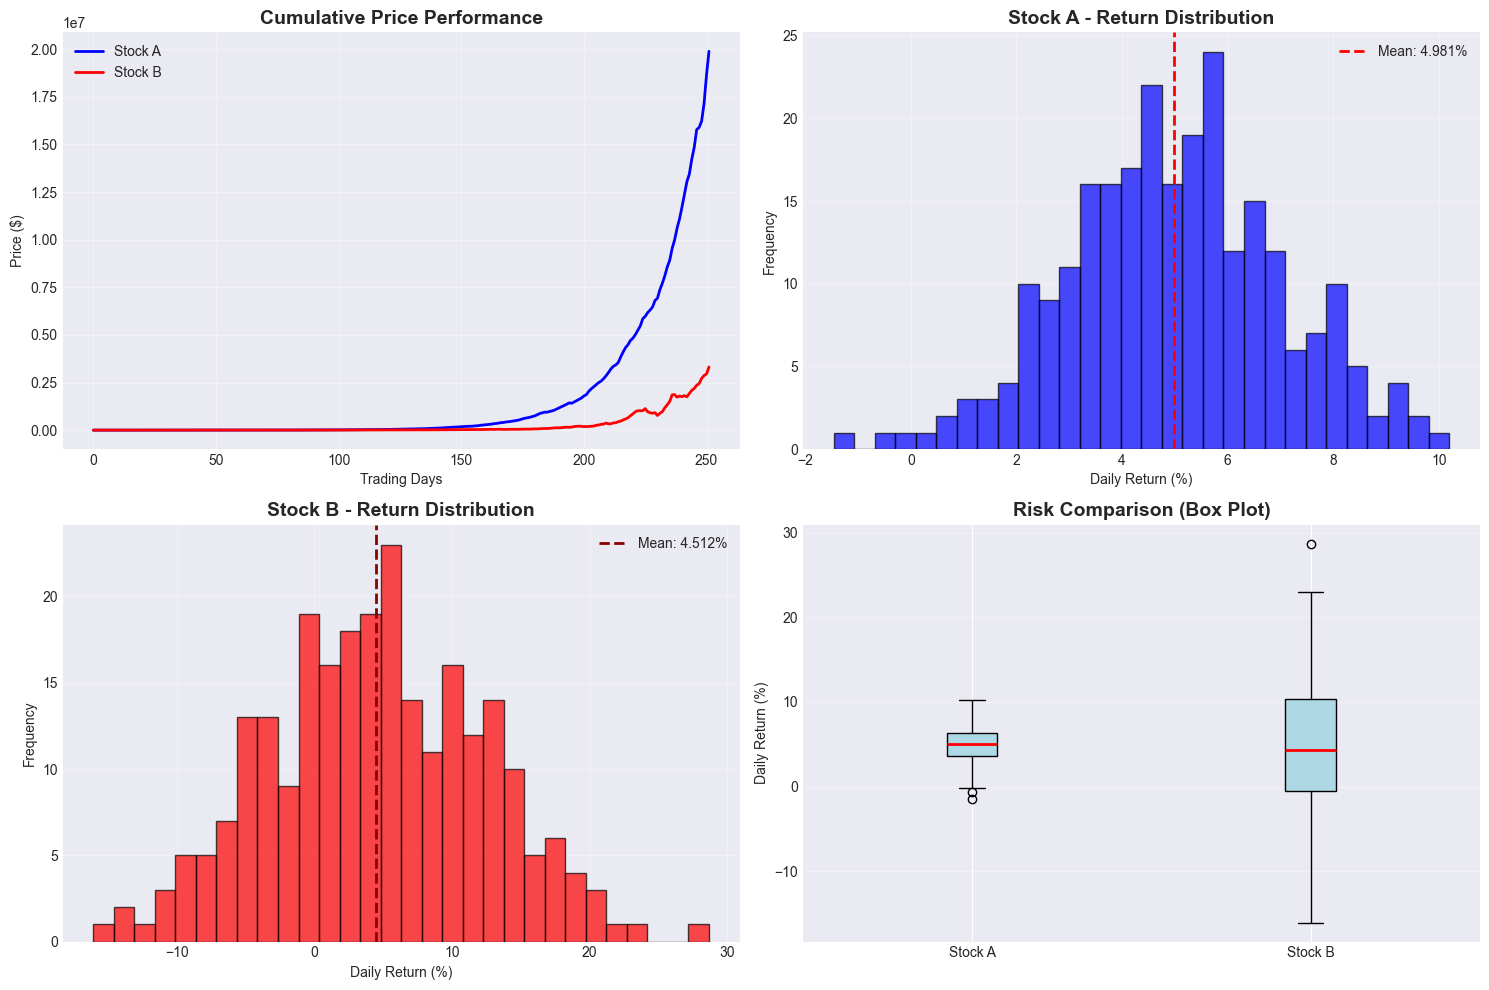



### SECTION 5: Population vs Sample Variance ###

Population: [ 1  2  3  4  5  6  7  8  9 10]

Population Variance (σ²) - divide by n:
  8.25

Sample Variance (s²) - divide by n-1:
  9.17

Why n-1? Bessel's correction accounts for bias when estimating
population variance from a sample.


KEY TAKEAWAYS

1. VARIANCE (σ² or s²):
   - Average of squared deviations from the mean
   - Units are squared (e.g., dollars²)
   - Larger variance = more spread out data

2. STANDARD DEVIATION (σ or s):
   - Square root of variance
   - Same units as original data
   - More interpretable than variance

3. WHY THEY MATTER:
   - Measure risk/volatility in finance
   - Assess data quality and consistency
   - Compare variability between datasets
   - Foundation for many statistical tests

4. REMEMBER:
   - Use ddof=1 for sample statistics (most common)
   - Use ddof=0 for population statistics
   - Larger std dev = more uncertainty/risk



In [2]:
# Variance and Standard Deviation Tutorial
# A comprehensive lesson on understanding spread in data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

print("=" * 60)
print("VARIANCE AND STANDARD DEVIATION TUTORIAL")
print("=" * 60)

# ============================================================================
# SECTION 1: Understanding the Basics
# ============================================================================

print("\n### SECTION 1: What is Variance and Standard Deviation? ###\n")

# Create two datasets with same mean but different spreads
np.random.seed(42)
data_low_spread = np.random.normal(50, 5, 100)  # mean=50, std=5
data_high_spread = np.random.normal(50, 15, 100)  # mean=50, std=15

print(f"Dataset 1 - Low Spread:")
print(f"  Mean: {np.mean(data_low_spread):.2f}")
print(f"  Variance: {np.var(data_low_spread, ddof=1):.2f}")
print(f"  Standard Deviation: {np.std(data_low_spread, ddof=1):.2f}")

print(f"\nDataset 2 - High Spread:")
print(f"  Mean: {np.mean(data_high_spread):.2f}")
print(f"  Variance: {np.var(data_high_spread, ddof=1):.2f}")
print(f"  Standard Deviation: {np.std(data_high_spread, ddof=1):.2f}")

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(data_low_spread, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(np.mean(data_low_spread), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].set_title('Low Spread Data (σ ≈ 5)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(data_high_spread, bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[1].axvline(np.mean(data_high_spread), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].set_title('High Spread Data (σ ≈ 15)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: Both datasets have similar means, but very different spreads!")

# ============================================================================
# SECTION 2: Calculating Variance and Standard Deviation Step-by-Step
# ============================================================================

print("\n\n### SECTION 2: Manual Calculation ###\n")

# Simple dataset for manual calculation
simple_data = np.array([2, 4, 4, 4, 5, 5, 7, 9])

print(f"Dataset: {simple_data}")
print(f"Number of values (n): {len(simple_data)}")

# Step 1: Calculate mean
mean = np.mean(simple_data)
print(f"\nStep 1 - Mean: {mean:.2f}")

# Step 2: Calculate deviations from mean
deviations = simple_data - mean
print(f"\nStep 2 - Deviations from mean:")
for i, (val, dev) in enumerate(zip(simple_data, deviations)):
    print(f"  Value {val}: {val} - {mean:.2f} = {dev:.2f}")

# Step 3: Square the deviations
squared_deviations = deviations ** 2
print(f"\nStep 3 - Squared deviations:")
for i, (dev, sq_dev) in enumerate(zip(deviations, squared_deviations)):
    print(f"  ({dev:.2f})² = {sq_dev:.2f}")

# Step 4: Calculate variance (sample variance, using n-1)
variance = np.sum(squared_deviations) / (len(simple_data) - 1)
print(f"\nStep 4 - Variance (s²):")
print(f"  Sum of squared deviations / (n-1)")
print(f"  {np.sum(squared_deviations):.2f} / {len(simple_data) - 1} = {variance:.2f}")

# Step 5: Calculate standard deviation
std_dev = np.sqrt(variance)
print(f"\nStep 5 - Standard Deviation (s):")
print(f"  √{variance:.2f} = {std_dev:.2f}")

# Verify with NumPy
print(f"\nVerification with NumPy:")
print(f"  np.var(data, ddof=1) = {np.var(simple_data, ddof=1):.2f}")
print(f"  np.std(data, ddof=1) = {np.std(simple_data, ddof=1):.2f}")

# ============================================================================
# SECTION 3: Visualizing Standard Deviation
# ============================================================================

print("\n\n### SECTION 3: Visualizing Standard Deviation ###\n")

# Generate normal distribution
mu = 100
sigma = 15
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the distribution
ax.plot(x, y, 'b-', linewidth=2, label='Normal Distribution')
ax.fill_between(x, y, alpha=0.1, color='blue')

# Mark mean
ax.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Mean (μ = {mu})')

# Mark standard deviations
colors = ['green', 'orange', 'purple']
for i in range(1, 4):
    # Positive side
    ax.axvline(mu + i*sigma, color=colors[i-1], linestyle=':', linewidth=1.5, 
               alpha=0.7, label=f'±{i}σ ({mu + i*sigma:.0f})')
    # Negative side
    ax.axvline(mu - i*sigma, color=colors[i-1], linestyle=':', linewidth=1.5, alpha=0.7)
    
    # Shade regions
    mask = (x >= mu + (i-1)*sigma) & (x <= mu + i*sigma)
    ax.fill_between(x[mask], y[mask], alpha=0.2, color=colors[i-1])
    mask = (x >= mu - i*sigma) & (x <= mu - (i-1)*sigma)
    ax.fill_between(x[mask], y[mask], alpha=0.2, color=colors[i-1])

# Add percentage labels
ax.text(mu, max(y)*0.5, '68.27%\n(±1σ)', ha='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
ax.text(mu + 2*sigma, max(y)*0.2, '95.45%\n(±2σ)', ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
ax.text(mu + 3*sigma, max(y)*0.05, '99.73%\n(±3σ)', ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('The 68-95-99.7 Rule (Empirical Rule)', fontsize=16, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("The Empirical Rule:")
print("  • ~68% of data falls within ±1 standard deviation")
print("  • ~95% of data falls within ±2 standard deviations")
print("  • ~99.7% of data falls within ±3 standard deviations")

# ============================================================================
# SECTION 4: Real-World Example - Stock Prices
# ============================================================================

print("\n\n### SECTION 4: Real-World Example - Stock Returns ###\n")

# Simulate stock returns for two companies
days = 252  # trading days in a year
np.random.seed(123)

stock_a_returns = np.random.normal(0.05, 0.02, days)  # Low volatility
stock_b_returns = np.random.normal(0.05, 0.08, days)  # High volatility

# Calculate cumulative returns
stock_a_cumulative = np.cumprod(1 + stock_a_returns) * 100
stock_b_cumulative = np.cumprod(1 + stock_b_returns) * 100

# Statistics
print("Stock A (Conservative):")
print(f"  Mean Daily Return: {np.mean(stock_a_returns)*100:.3f}%")
print(f"  Std Dev (Volatility): {np.std(stock_a_returns, ddof=1)*100:.3f}%")

print("\nStock B (Aggressive):")
print(f"  Mean Daily Return: {np.mean(stock_b_returns)*100:.3f}%")
print(f"  Std Dev (Volatility): {np.std(stock_b_returns, ddof=1)*100:.3f}%")

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price evolution
axes[0, 0].plot(stock_a_cumulative, label='Stock A', linewidth=2, color='blue')
axes[0, 0].plot(stock_b_cumulative, label='Stock B', linewidth=2, color='red')
axes[0, 0].set_title('Cumulative Price Performance', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Trading Days')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Returns distribution - Stock A
axes[0, 1].hist(stock_a_returns * 100, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].axvline(np.mean(stock_a_returns) * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {np.mean(stock_a_returns)*100:.3f}%')
axes[0, 1].set_title('Stock A - Return Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Daily Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Returns distribution - Stock B
axes[1, 0].hist(stock_b_returns * 100, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].axvline(np.mean(stock_b_returns) * 100, color='darkred', linestyle='--', 
                   linewidth=2, label=f'Mean: {np.mean(stock_b_returns)*100:.3f}%')
axes[1, 0].set_title('Stock B - Return Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Daily Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Box plot comparison
axes[1, 1].boxplot([stock_a_returns * 100, stock_b_returns * 100], 
                   labels=['Stock A', 'Stock B'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue'),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_title('Risk Comparison (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Daily Return (%)')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 5: Population vs Sample Variance
# ============================================================================

print("\n\n### SECTION 5: Population vs Sample Variance ###\n")

population = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(f"Population: {population}")
print(f"\nPopulation Variance (σ²) - divide by n:")
print(f"  {np.var(population, ddof=0):.2f}")
print(f"\nSample Variance (s²) - divide by n-1:")
print(f"  {np.var(population, ddof=1):.2f}")

print("\nWhy n-1? Bessel's correction accounts for bias when estimating")
print("population variance from a sample.")

# ============================================================================
# SUMMARY
# ============================================================================

print("\n\n" + "=" * 60)
print("KEY TAKEAWAYS")
print("=" * 60)
print("""
1. VARIANCE (σ² or s²):
   - Average of squared deviations from the mean
   - Units are squared (e.g., dollars²)
   - Larger variance = more spread out data

2. STANDARD DEVIATION (σ or s):
   - Square root of variance
   - Same units as original data
   - More interpretable than variance

3. WHY THEY MATTER:
   - Measure risk/volatility in finance
   - Assess data quality and consistency
   - Compare variability between datasets
   - Foundation for many statistical tests

4. REMEMBER:
   - Use ddof=1 for sample statistics (most common)
   - Use ddof=0 for population statistics
   - Larger std dev = more uncertainty/risk
""")